In [2]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from matplotlib import cm

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report

C:\Users\summaya123\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
data = pd.read_csv("ml_sensor_weather_data.csv",index_col=10)
data.shape

(1095, 10)

In [5]:
data.head()

,air_pressure,air_temperature,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,rain_accumulation,rain_duration,relative_humidity,relative_humidity_pm
row_number,,,,,,,,,,
0,919.060000,23.790000,281.100000,3.080354,275.400000,3.863283,0.89,4.0,43.420000,37.160000
1,917.347688,21.891024,101.935179,2.443009,140.471549,3.533324,0.00,0.0,24.328697,20.426597
2,923.040000,15.910000,51.000000,17.067852,63.700000,22.100967,0.00,20.0,8.900000,14.460000
3,920.502751,21.188275,198.832133,4.337363,211.203341,5.190045,0.00,0.0,12.189102,12.742547
4,921.160000,6.830000,277.800000,1.856660,136.500000,2.863283,8.90,14730.0,92.410000,76.740000


In [6]:
data.isnull().sum(axis = 0)

air_pressure            3
air_temperature         5
avg_wind_direction      4
avg_wind_speed          3
max_wind_direction      3
max_wind_speed          4
rain_accumulation       6
rain_duration           3
relative_humidity       0
relative_humidity_pm    0
dtype: int64

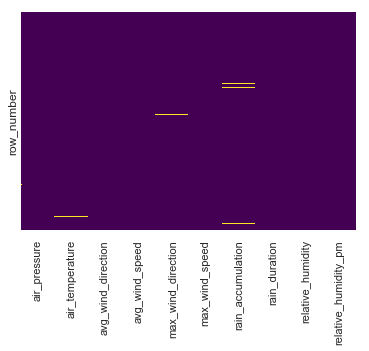

In [7]:
#heatmap
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
df = data.copy()
df.dropna(inplace=True)
print(df.shape)
df.isnull().sum(axis = 0)

(1064, 10)


air_pressure            0
air_temperature         0
avg_wind_direction      0
avg_wind_speed          0
max_wind_direction      0
max_wind_speed          0
rain_accumulation       0
rain_duration           0
relative_humidity       0
relative_humidity_pm    0
dtype: int64

In [9]:
df.describe()

,air_pressure,air_temperature,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,rain_accumulation,rain_duration,relative_humidity,relative_humidity_pm
count,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000
mean,918.904120,18.345894,142.316154,5.486733,148.461627,7.000654,0.191601,266.397457,34.078380,35.150261
std,3.178938,6.204463,69.167671,4.533824,67.116536,5.590178,1.537646,1503.091554,25.356996,22.364898
min,907.990000,2.640000,15.500000,0.693451,28.900000,1.185578,0.000000,0.000000,6.090000,5.300000
25%,916.595376,14.110000,65.979244,2.248768,76.335351,3.064608,0.000000,0.000000,15.093365,17.360468
50%,918.961039,18.765822,165.937461,3.869906,176.350000,4.943637,0.000000,0.000000,23.135000,24.371286
75%,921.169054,23.072707,191.100000,7.264463,201.125000,8.747888,0.000000,0.000000,44.660000,51.922500
max,929.320000,37.170000,343.400000,23.554978,312.200000,29.840780,24.020000,17704.000000,92.620000,92.250000


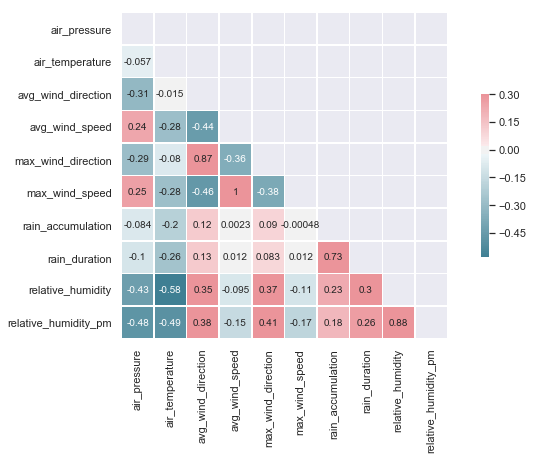

In [10]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, annot=True,  linewidths=.5, cbar_kws={"shrink": .5})

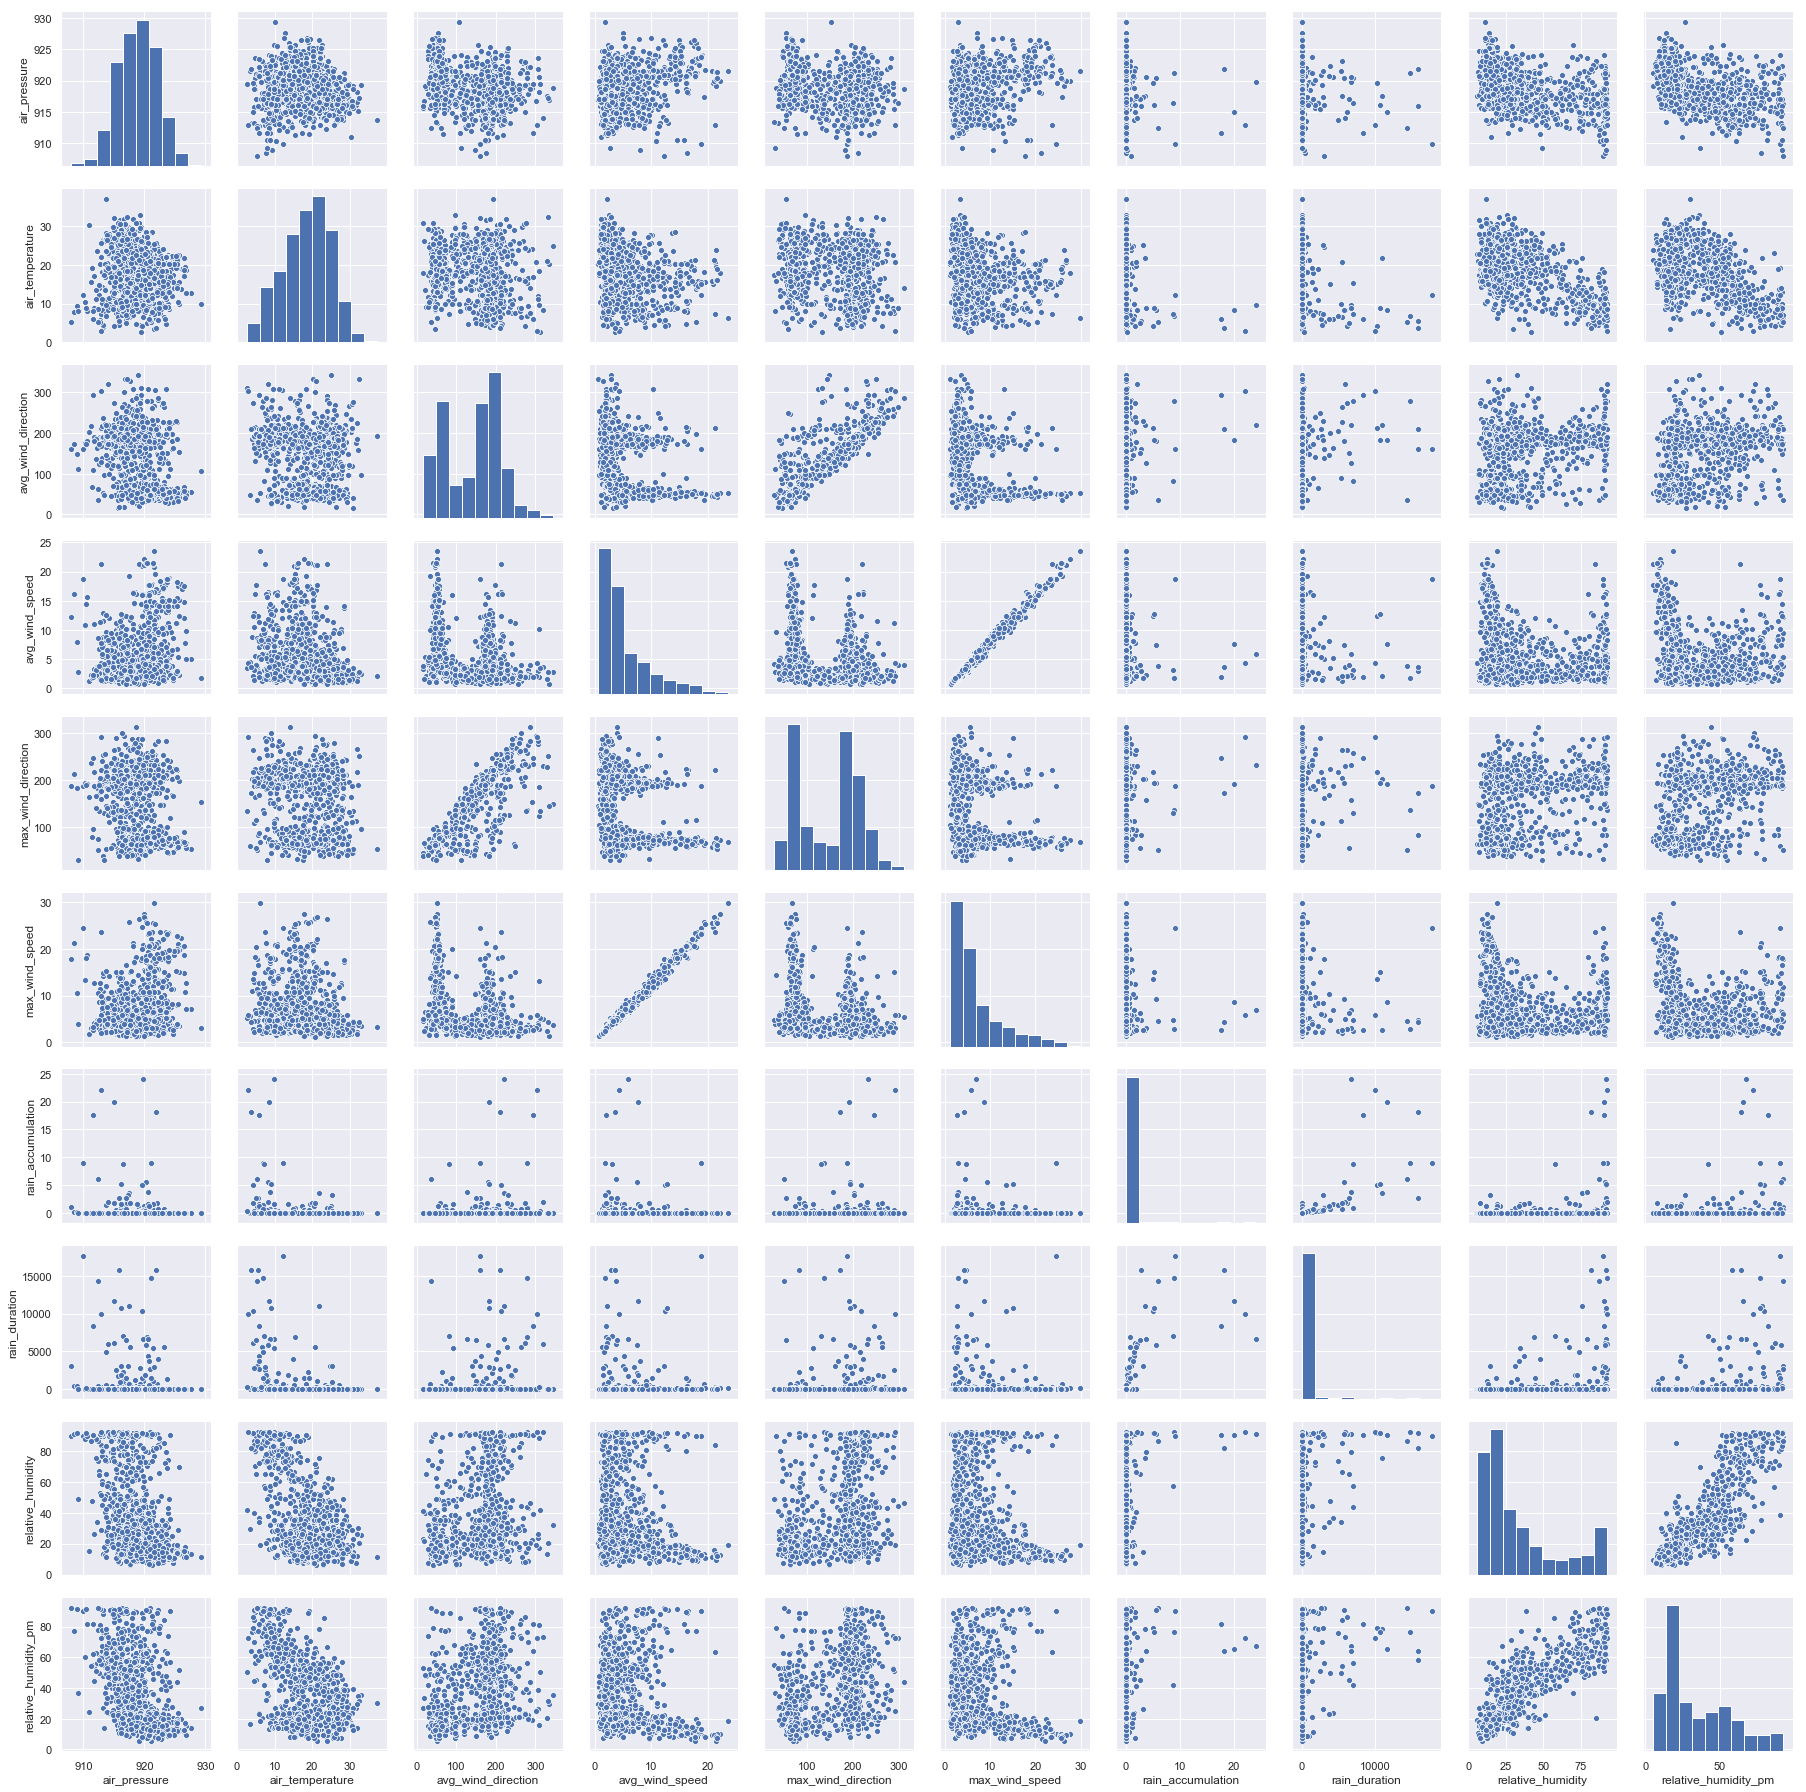

In [11]:
# sns.set(style="ticks")
plot = sns.pairplot(df)#, hue="species")

In [12]:
#Remove maximum, keep average
df.columns

Index(['air_pressure', 'air_temperature', 'avg_wind_direction',
       'avg_wind_speed', 'max_wind_direction', 'max_wind_speed',
       'rain_accumulation', 'rain_duration', 'relative_humidity',
       'relative_humidity_pm'],
      dtype='object')

In [13]:
df.drop(['max_wind_direction', 'max_wind_speed'], axis=1, inplace=True)
df.columns

Index(['air_pressure', 'air_temperature', 'avg_wind_direction',
       'avg_wind_speed', 'rain_accumulation', 'rain_duration',
       'relative_humidity', 'relative_humidity_pm'],
      dtype='object')

In [14]:
df['relative_humidity_pm_bin'] = df['relative_humidity_pm'].apply(lambda x: 0 if x <= 70 else 1)
df.head()

,air_pressure,air_temperature,avg_wind_direction,avg_wind_speed,rain_accumulation,rain_duration,relative_humidity,relative_humidity_pm,relative_humidity_pm_bin
row_number,,,,,,,,,
0,919.060000,23.790000,281.100000,3.080354,0.89,4.0,43.420000,37.160000,0
1,917.347688,21.891024,101.935179,2.443009,0.00,0.0,24.328697,20.426597,0
2,923.040000,15.910000,51.000000,17.067852,0.00,20.0,8.900000,14.460000,0
3,920.502751,21.188275,198.832133,4.337363,0.00,0.0,12.189102,12.742547,0
4,921.160000,6.830000,277.800000,1.856660,8.90,14730.0,92.410000,76.740000,1


In [15]:
tmp = df.copy().reset_index()
tmp.groupby('relative_humidity_pm_bin').agg({'row_number': ['count']})

,row_number
,count
relative_humidity_pm_bin,
0,965
1,99


In [16]:
X = df[['air_pressure', 'air_temperature', 'avg_wind_direction',
       'avg_wind_speed', 'rain_accumulation', 'rain_duration',
       'relative_humidity'
       ]]

y = df['relative_humidity_pm_bin']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,  random_state=0)

In [17]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
#######################
# Logistic Regression #
#######################
# fit data
lr_clf = (LogisticRegression(penalty='l2',  # regularization to reduce overfitting
                             C=1,           # controlling regularization (e.g. large values of C > less regularization)
                             random_state=123 # seed (make results reproducible)
                         )
       .fit(X_train_scaled, y_train))
print('model classes LR: Low={} High={}'.format(*lr_clf.classes_))
print('model coeff (w): {}'.format(lr_clf.coef_))
print('number of model coeff (w): {}'.format(len(lr_clf.coef_[0])))
print('model intercept (b): {}'.format(lr_clf.intercept_))

#################
# Random Forest #
#################
# create a parameter grid 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3, 7],
    'min_samples_leaf': [3],
    'min_samples_split': [8],
    'n_estimators': [100]}
    
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf_clf = RandomForestClassifier()
rf_grid_search = GridSearchCV(estimator = rf_clf, 
                           param_grid = param_grid, 
                           cv = 3, 
                           n_jobs = -1)
# Fit the grid search to the data
rf_grid_search.fit(X_train_scaled, y_train)
rf_grid_search.best_params_

model classes LR: Low=0 High=1
model coeff (w): [[-1.14171789 -3.46984589  0.88178782  1.28548637 -0.24779984 -0.2383473
   3.86605328]]
number of model coeff (w): 7
model intercept (b): [-3.13014939]


{'bootstrap': True,
 'max_depth': 100,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [19]:
#######################
# Logistic Regression #
#######################
# predict class for each test tuple
y_predict_lr = lr_clf.predict(X_test_scaled) # Returns the probability of the sample for each class in the model, where classes are ordered [0 1]
pd.Series(y_predict_lr, index = X_test.index.astype(int))[:10]

row_number
178     0
1013    0
704     0
533     0
882     0
712     0
254     0
1036    0
642     1
207     0
dtype: int64

In [20]:
# predict class probability for each class 
y_predict_proba_lr = lr_clf.predict_proba(X_test_scaled) # Returns the probability of the sample for each class in the model, where classes are ordered [0 1]
y_predict_proba_lr[:10]

array([[0.98212915, 0.01787085],
       [0.92853464, 0.07146536],
       [0.95617353, 0.04382647],
       [0.97530161, 0.02469839],
       [0.97686833, 0.02313167],
       [0.99195739, 0.00804261],
       [0.99007001, 0.00992999],
       [0.97956753, 0.02043247],
       [0.46076208, 0.53923792],
       [0.82582265, 0.17417735]])

In [21]:
# predict class for class 1 'High' humidity_pm
y_predict_proba_high_lr = pd.Series(lr_clf.predict_proba(X_test_scaled)[:, 1], index = X_test.index.astype(int))
y_predict_proba_high_lr[:10]

row_number
178     0.017871
1013    0.071465
704     0.043826
533     0.024698
882     0.023132
712     0.008043
254     0.009930
1036    0.020432
642     0.539238
207     0.174177
dtype: float64

In [22]:
#################
# Random Forest #
#################
# predict class for each test tuple
y_predict_rf = rf_grid_search.predict(X_test_scaled) 
pd.Series(y_predict_rf, index = X_test.index.astype(int))[:10]

row_number
178     0
1013    0
704     0
533     0
882     0
712     0
254     0
1036    0
642     1
207     0
dtype: int64

In [23]:
# predict class probability for each class 
y_predict_proba_rf = rf_grid_search.predict_proba(X_test_scaled) 
y_predict_proba_rf[:10]

array([[9.99041802e-01, 9.58198225e-04],
       [9.77701621e-01, 2.22983785e-02],
       [9.94699154e-01, 5.30084626e-03],
       [9.93012019e-01, 6.98798077e-03],
       [9.96666667e-01, 3.33333333e-03],
       [9.98012019e-01, 1.98798077e-03],
       [9.71663470e-01, 2.83365304e-02],
       [9.98910223e-01, 1.08977717e-03],
       [1.43279582e-01, 8.56720418e-01],
       [9.57696275e-01, 4.23037250e-02]])

In [24]:
# predict class for class 1 'High' humidity_pm
y_predict_proba_high_rf = pd.Series(rf_grid_search.predict_proba(X_test_scaled)[:, 1], index = X_test.index.astype(int))
y_predict_proba_high_rf[:10]

row_number
178     0.000958
1013    0.022298
704     0.005301
533     0.006988
882     0.003333
712     0.001988
254     0.028337
1036    0.001090
642     0.856720
207     0.042304
dtype: float64

In [25]:
# LR
print('Accuracy of LR classifier on training set: {:.3f}'
     .format(lr_clf.score(X_train_scaled, y_train)))
print('Accuracy of LR classifier on test set: {:.3f}'
     .format(lr_clf.score(X_test_scaled, y_test)))

Accuracy of LR classifier on training set: 0.946
Accuracy of LR classifier on test set: 0.928


In [26]:
# RF
print('\nAccuracy of RF classifier on training set: {:.3f}'
     .format(rf_grid_search.score(X_train_scaled, y_train)))
print('Accuracy of RF classifier on test set: {:.3f}\n'
     .format(rf_grid_search.score(X_test_scaled, y_test)))


Accuracy of RF classifier on training set: 0.974
Accuracy of RF classifier on test set: 0.919



In [27]:
target_names = ['Low', 'High']

# LR
average_precision = average_precision_score(y_test, y_predict_lr)
print('AP Logistic Regression Classifier: {0:0.2f}'.format(average_precision))
print(classification_report(y_test, y_predict_lr, target_names=target_names))

# RF
average_precision = average_precision_score(y_test, y_predict_rf)
print('AP Random Forest Classifier: {0:0.2f}'.format(average_precision))
print(classification_report(y_test, y_predict_rf, target_names=target_names))

AP Logistic Regression Classifier: 0.41
             precision    recall  f1-score   support

        Low       0.95      0.98      0.96       287
       High       0.71      0.52      0.60        33

avg / total       0.92      0.93      0.92       320

AP Random Forest Classifier: 0.41
             precision    recall  f1-score   support

        Low       0.95      0.95      0.95       287
       High       0.61      0.61      0.61        33

avg / total       0.92      0.92      0.92       320



In [28]:
pd.DataFrame(confusion_matrix(y_test, y_predict_lr))

,0,1
0,280,7
1,16,17


In [29]:
pd.DataFrame(confusion_matrix(y_test, y_predict_rf))

,0,1
0,274,13
1,13,20


In [30]:
"""
the AUC is usually computed using the prediction score, 
and not the class label predictions. 
That means you should not be using predict() 
but rather predict_proba() 
[which produces two probabilities, make sure to grab the correct one] or decision_function().
"""

# LR
print('AUC score LR: {:.3f}'.format(roc_auc_score(y_test, y_predict_proba_high_lr)))

# RF
print('AUC score RF: {:.3f}'.format(roc_auc_score(y_test, y_predict_proba_high_rf)))

AUC score LR: 0.955
AUC score RF: 0.950


(0.0, 1.0)

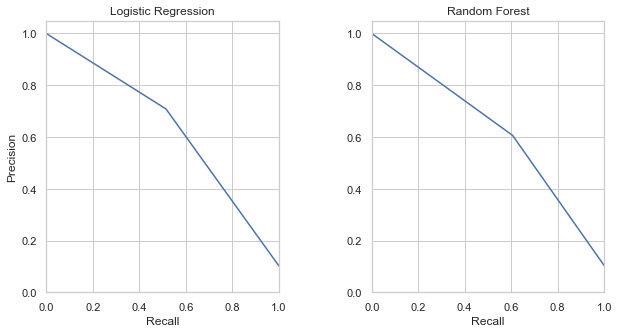

In [33]:
sns.set_style("whitegrid")
f, axes = plt.subplots(1, 2, figsize=(10,5))
plt.subplots_adjust(hspace = 0.6, wspace = 0.4)
axes = axes.flatten()

# Logistic Regression
# get values for precision-recall plot
precision, recall, _ = precision_recall_curve(y_test, y_predict_lr)

# plot precision/recall
plot = sns.lineplot(x=recall, y=precision, data=None, ax=axes[0])
axes[0].set(xlabel='Recall', ylabel='Precision')
axes[0].set_title('Logistic Regression')
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlim([0.0, 1.0])

#Random Forest
# get values for precision-recall plot
precision, recall, _ = precision_recall_curve(y_test, y_predict_rf)

# plot precision/recall
plot = sns.lineplot(x=recall, y=precision, data=None, ax=axes[1])
axes[1].set(xlabel='Recall')
axes[1].set_title('Random Forest')
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlim([0.0, 1.0])

(0.0, 1.0)

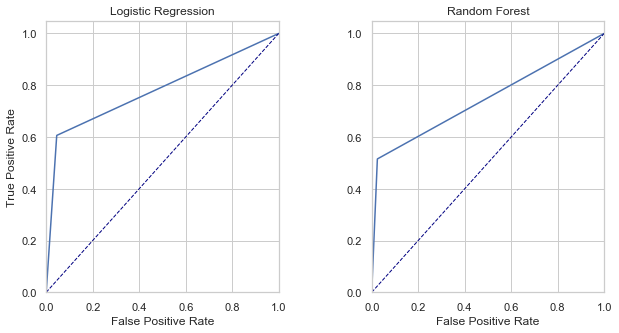

In [34]:
f, axes = plt.subplots(1, 2, figsize=(10,5))
plt.subplots_adjust(hspace = 0.6, wspace = 0.4)
axes = axes.flatten()

#Linear regression
# get values for ROC plot
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_predict_rf)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# plot ROC
plot = sns.lineplot(x=fpr_lr, y=tpr_lr, data=None, ax=axes[0])
axes[0].plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
axes[0].set(xlabel='False Positive Rate', ylabel='True Positive Rate')
axes[0].set_title('Logistic Regression')
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlim([0.0, 1.0])

#Random forest
# get values for ROC plot
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_predict_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# plot ROC
plot = sns.lineplot(x=fpr_lr, y=tpr_lr, data=None, ax=axes[1])
axes[1].plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
axes[1].set(xlabel='False Positive Rate')
axes[1].set_title('Random Forest')
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlim([0.0, 1.0])